Implement a KNN model to classify the animals in to categorie.

In [1]:
#importing common libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading csv file
df = pd.read_csv(r"C:\Users\Siddhant Sonawane\Downloads\Zoo.csv")
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [3]:
#information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [4]:
#To describe data
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


Description -  The Data represents different types of animals based on their structure.Almost all feature is lying between minimum value=0 and maximum value=1 except 'legs' and 'type'. This '0' and '1' represents presence of that perticular feature.
Feature 'type' is our target feature. Feature 'legs' has maximum '8' and minimum '0' value.

In [5]:
#chrcking null values
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [6]:
#checking duplicates
df.duplicated().sum()

0

In [7]:
#chekcing unique values in types
df['type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [8]:
df = df.rename({'animal name':'animal_name'},axis=1)
df.head(1)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1


In [9]:
#checking animal names
df['animal_name'].unique()

array(['aardvark', 'antelope', 'bass', 'bear', 'boar', 'buffalo', 'calf',
       'carp', 'catfish', 'cavy', 'cheetah', 'chicken', 'chub', 'clam',
       'crab', 'crayfish', 'crow', 'deer', 'dogfish', 'dolphin', 'dove',
       'duck', 'elephant', 'flamingo', 'flea', 'frog', 'fruitbat',
       'giraffe', 'girl', 'gnat', 'goat', 'gorilla', 'gull', 'haddock',
       'hamster', 'hare', 'hawk', 'herring', 'honeybee', 'housefly',
       'kiwi', 'ladybird', 'lark', 'leopard', 'lion', 'lobster', 'lynx',
       'mink', 'mole', 'mongoose', 'moth', 'newt', 'octopus', 'opossum',
       'oryx', 'ostrich', 'parakeet', 'penguin', 'pheasant', 'pike',
       'piranha', 'pitviper', 'platypus', 'polecat', 'pony', 'porpoise',
       'puma', 'pussycat', 'raccoon', 'reindeer', 'rhea', 'scorpion',
       'seahorse', 'seal', 'sealion', 'seasnake', 'seawasp', 'skimmer',
       'skua', 'slowworm', 'slug', 'sole', 'sparrow', 'squirrel',
       'starfish', 'stingray', 'swan', 'termite', 'toad', 'tortoise',
       

<AxesSubplot:>

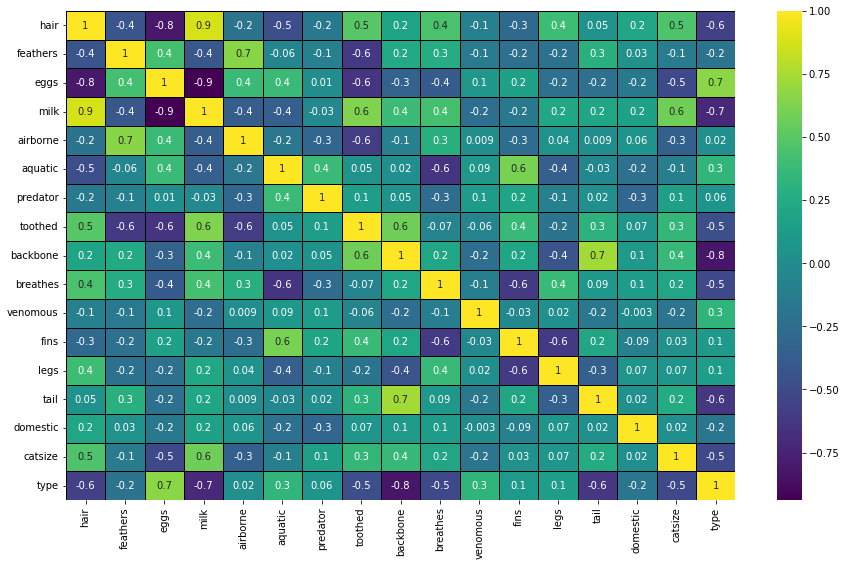

In [10]:
# correlation analysis

plt.figure(figsize=(15,9))
sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap="viridis", cbar=True, linewidths=0.5, linecolor='black')

Text(0.5, 1.0, 'Features for the Animals')

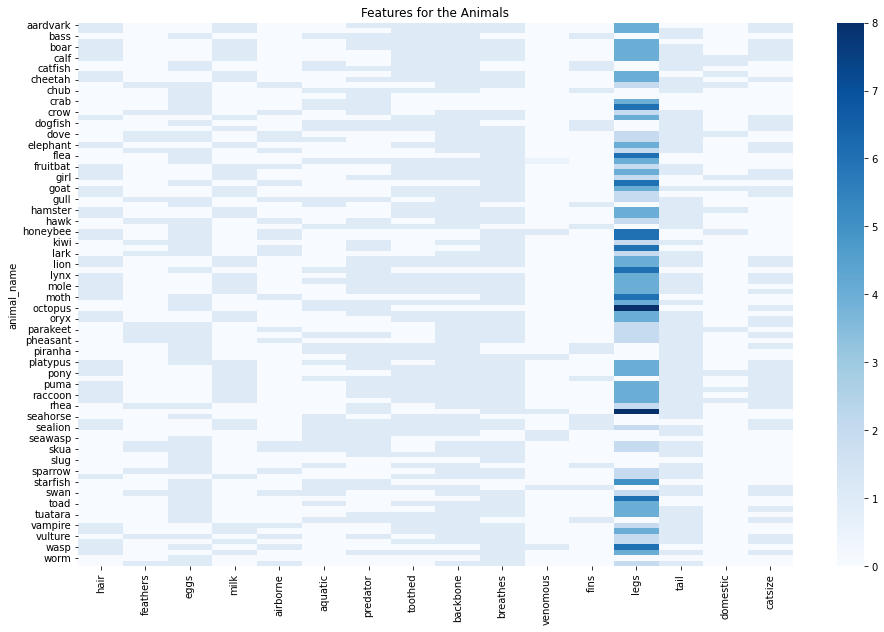

In [11]:
df_temp = df.drop(['type'], axis=1)
df_temp = df_temp.groupby(by='animal_name').mean()
plt.rcParams['figure.figsize'] = (16,10) 
sns.heatmap(df_temp, cmap="Blues")
ax = plt.gca()
ax.set_title("Features for the Animals")

As mentioned previously in the data description, we will have to treat the legs columns differently as it does not present data the same way as the remaining columns. So, we will create a column has_legs that checks if an animal has legs (1) or not (0).

In [12]:
zoo_df = df.copy()
zoo_df['has_legs'] = np.where(zoo_df['legs']>0,1,0)
zoo_df

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type,has_legs
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,0
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6,1
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7,0


Text(0.5, 1.0, 'Features for the Animals')

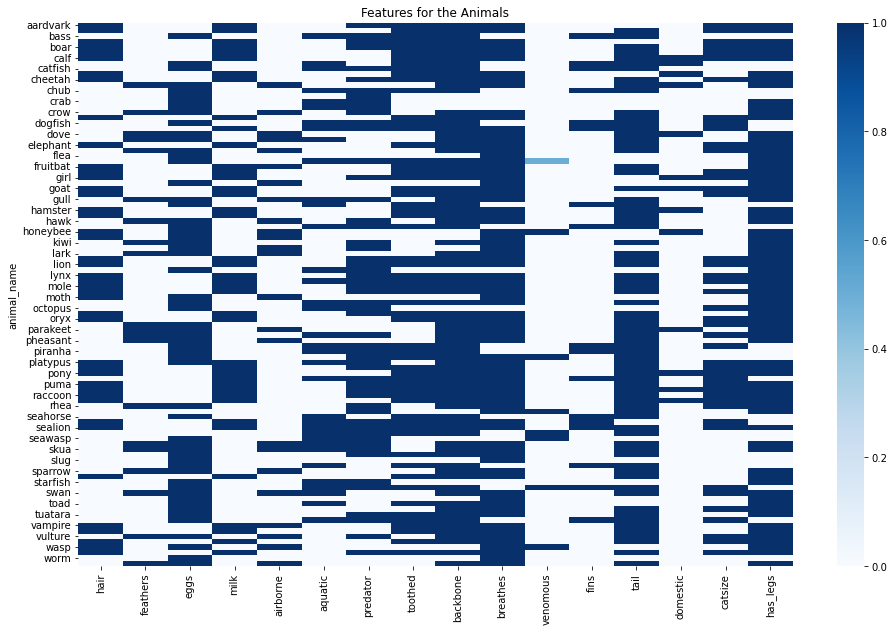

In [13]:
zoo_df_temp = zoo_df.copy()
zoo_df_temp = zoo_df_temp.drop(zoo_df_temp[['legs','type']],axis=1)
zoo_df_temp=zoo_df_temp.groupby(by='animal_name').mean()
plt.rcParams['figure.figsize']=(16,10)
sns.heatmap(zoo_df_temp,cmap='Blues')
ax = plt.gca()
ax.set_title('Features for the Animals')

Text(0.5, 1.0, 'Histogram of Classes')

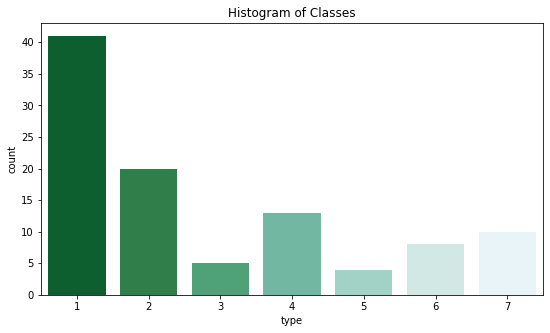

In [14]:
#visualizing animals
plt.figure(figsize=(9,5))
sns.countplot(zoo_df['type'],palette='BuGn_r')
plt.title('Histogram of Classes')

From the above graph we can infer that Highest number of animal present in 'type-1' class and Lowest number of animal present in 'type-5'. 

<AxesSubplot:xlabel='legs', ylabel='count'>

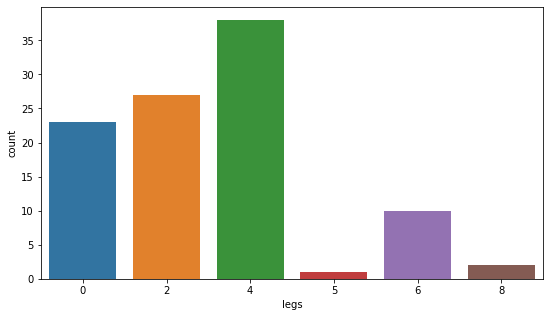

In [15]:
#visualizing other features

plt.figure(figsize=(9,5))
sns.countplot(zoo_df['legs'],)


*most of the animals have 4 legs and animals with 5 legs are the least one.

In [16]:
zoo_df.columns

Index(['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type', 'has_legs'],
      dtype='object')

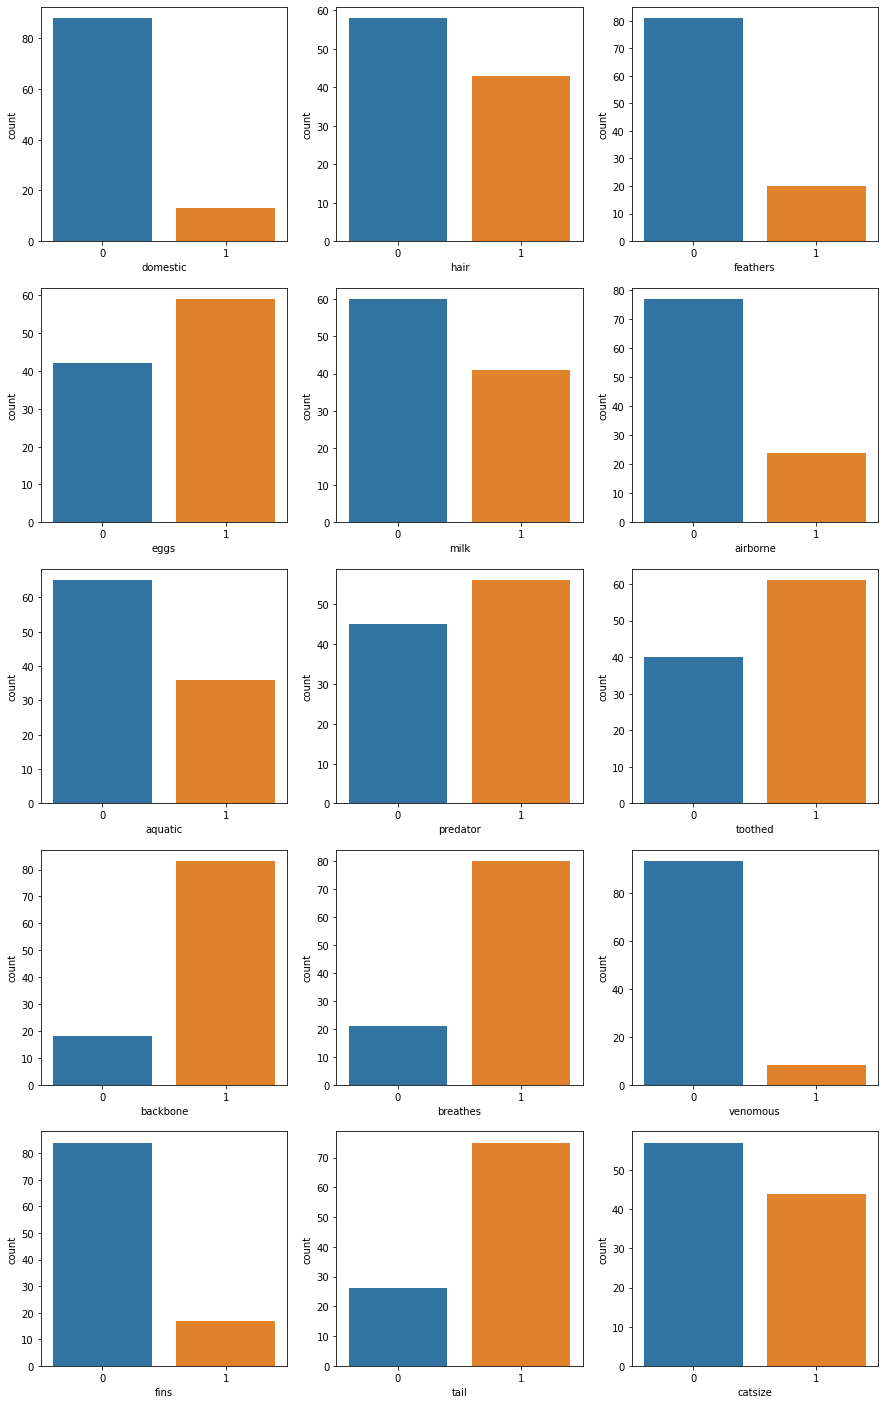

In [17]:
fig, ax =plt.subplots(5,3, figsize=(15,25)) 

sns.countplot(zoo_df["domestic"], ax=ax[0,0])
sns.countplot(zoo_df["hair"], ax=ax[0,1])
sns.countplot(zoo_df["feathers"], ax=ax[0,2])

sns.countplot(zoo_df["eggs"], ax=ax[1,0])
sns.countplot(zoo_df["milk"], ax=ax[1,1])
sns.countplot(zoo_df["airborne"], ax=ax[1,2])

sns.countplot(zoo_df["aquatic"], ax=ax[2,0])
sns.countplot(zoo_df["predator"], ax=ax[2,1])
sns.countplot(zoo_df["toothed"], ax=ax[2,2])

sns.countplot(zoo_df["backbone"], ax=ax[3,0])
sns.countplot(zoo_df["breathes"], ax=ax[3,1])
sns.countplot(zoo_df["venomous"], ax=ax[3,2])

sns.countplot(zoo_df["fins"], ax=ax[4,0])
sns.countplot(zoo_df["tail"], ax=ax[4,1])
sns.countplot(zoo_df["catsize"], ax=ax[4,2]);

In [18]:
#data-preprocessing 
zoo_df1 = zoo_df.drop(['animal_name','legs'],axis=1)
zoo_df1.head(1)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,tail,domestic,catsize,type,has_legs
0,1,0,0,1,0,0,1,1,1,1,0,0,0,0,1,1,1


In [19]:
#splitting data
X = zoo_df1.drop(['type'],axis=1)
Y = zoo_df1[['type']]

In [20]:
X.head(3)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,tail,domestic,catsize,has_legs
0,1,0,0,1,0,0,1,1,1,1,0,0,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,1,0,0,0


In [21]:
Y.head(3)

,type
0,1
1,1
2,4


In [22]:
# Using grid search algorithm for hyper-parameter tuning

#importing library 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [23]:
#creating object 
n_neigh = np.array([2*i+1 for i in range(1,20)])
prams_grid = dict(n_neighbors = n_neigh)

In [24]:
#model
model=KNeighborsClassifier()
grid=GridSearchCV(estimator=model,param_grid=prams_grid,cv =10)

#fitting on grid object
grid.fit(X,Y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
       37, 39])})

In [25]:
print(grid.best_score_)
print(grid.best_params_)

0.95
{'n_neighbors': 5}


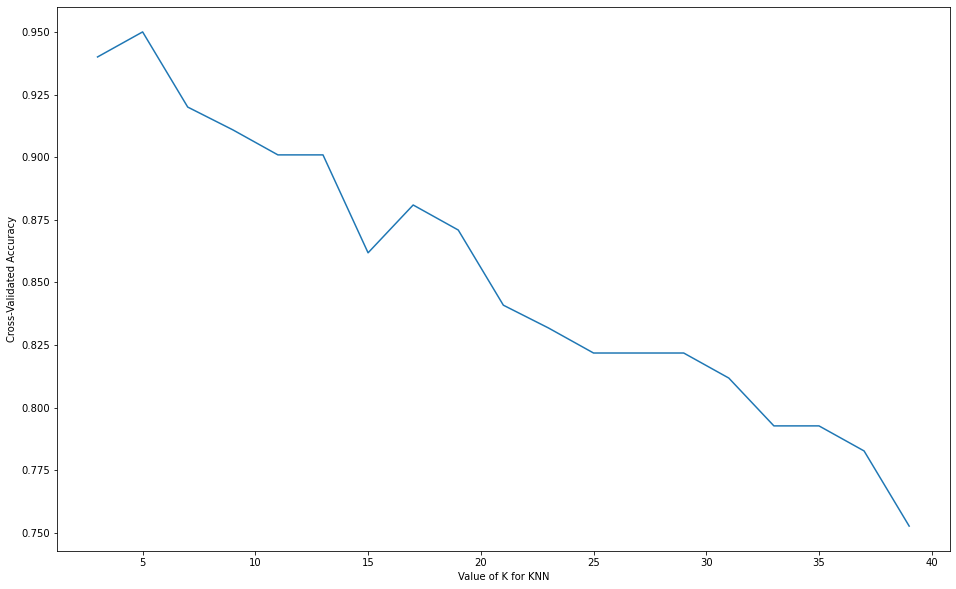

In [26]:
# visualizing CV results

k_range = ([2*i+1  for i in range(1,20)])
k_scores = []

# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, Y, cv=10)
    k_scores.append(score.mean())
    
#plot to see clearly
plt.plot(k_range,k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

*From the CV graph we can see than as the value for K increases the cross validated accurancy decreases.

In [27]:
# building KNN model with neighbor=5
#importing kfold 
from sklearn.model_selection import KFold

kfold=KFold(n_splits=10)

#model
model_knn = KNeighborsClassifier(n_neighbors=5)
result = cross_val_score(model_knn, X, Y, cv=kfold)

In [28]:
print(result.mean())

0.9400000000000001


KNN model using Train_test_splits

In [29]:
#importing train_test_split library
from sklearn.model_selection import train_test_split

In [48]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=30)

In [49]:
# building KNN model with k=5
model_1 = KNeighborsClassifier(n_neighbors=5)

#fitting on train data
model_1.fit(x_train,y_train)

KNeighborsClassifier()

In [50]:
#predicting on test data
preds=model_1.predict(x_test)

In [51]:
preds = preds.reshape(31,1)

In [52]:
#importing classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       0.89      1.00      0.94         8
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         1
           6       0.75      1.00      0.86         3
           7       0.00      0.00      0.00         1

    accuracy                           0.94        31
   macro avg       0.66      0.71      0.69        31
weighted avg       0.88      0.94      0.91        31



*Here we are getting the same result of Accuracy which is 94%.